In [1]:
!pip install easyocr
!pip install imutils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 11.4 MB/s eta 0:00:00


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
import easyocr


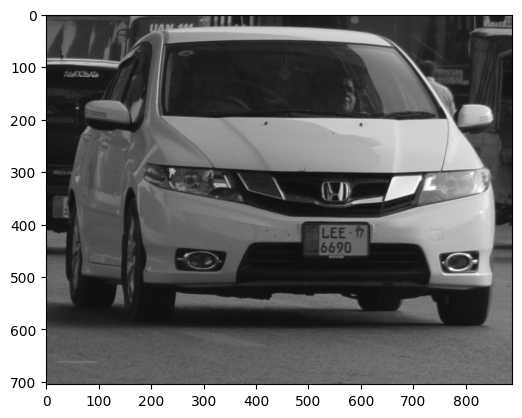

In [3]:
img= cv2.imread("/content/DSC_1072.JPG")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

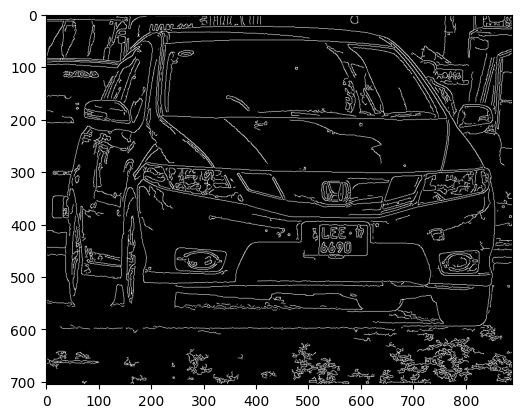

In [4]:
# bfilter = cv2.bilateralFilter(gray,11,17,17)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

edged = cv2.Canny(blurred,5,50)
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

In [5]:
keypoints = cv2.findContours(edged.copy(),cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea,reverse=True)[:10]

In [6]:
location = None
for contour in contours:
  approx = cv2.approxPolyDP(contour,10,True)
  if len(approx) ==4:
    location = approx
    break

In [7]:
location

array([[[520, 403]],

       [[519, 459]],

       [[611, 458]],

       [[610, 402]]], dtype=int32)

In [8]:
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[location],0,255,-1)
new_image = cv2.bitwise_and(img,img,mask=mask)


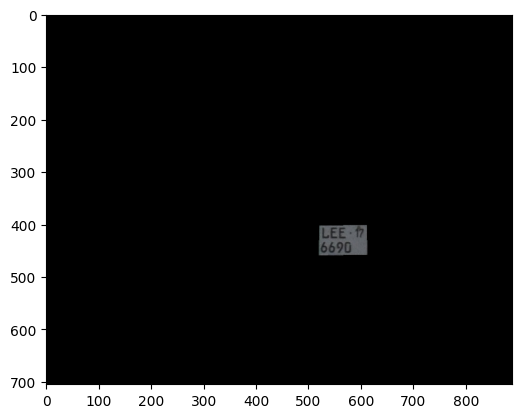

In [9]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

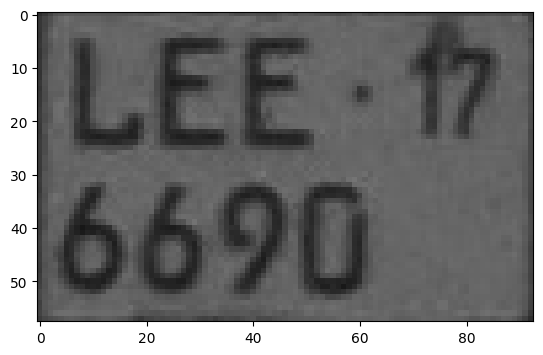

In [10]:
(x,y) =np.where(mask==255)
(x1,y1) = np.min(x),np.min(y)
(x2,y2) = np.max(x),np.max(y)
cropped_image = gray[x1:x2+1,y1:y2+1]
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))

In [11]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[0, 0], [56, 0], [56, 32], [0, 32]], 'LEE', 0.9965439020219781),
 ([[66, 0], [90, 0], [90, 26], [66, 26]], '7', 0.9888186060903195),
 ([[0, 28], [68, 28], [68, 58], [0, 58]], '6620', 0.7559956908226013)]

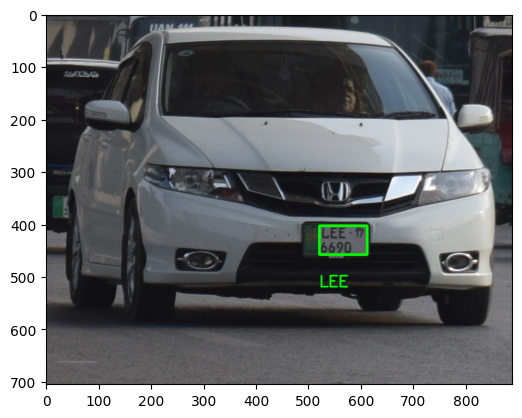

In [12]:
text = None  # Initialize text as None
if result:
    # Check if result is not empty before accessing its elements
    if len(result[0]) >= 2:
        text = result[0][-2]

if text is not None:
    # Rest of your code for drawing text and rectangle
    font = cv2.FONT_HERSHEY_SIMPLEX
    res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1] + 60), fontFace=font, fontScale=1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
    res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0, 255, 0), 3)
    plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
else:
    print("No text detected in the result.")


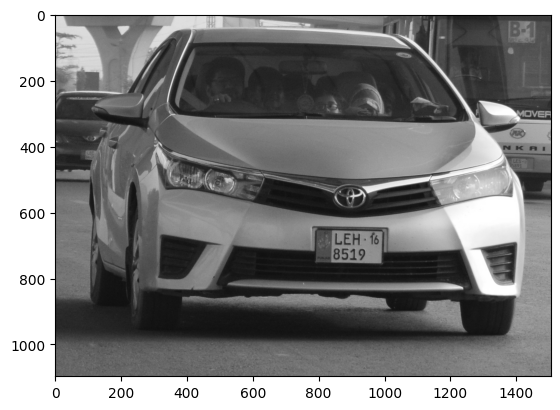

In [27]:
img= cv2.imread("/content/DSC_1089.JPG")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

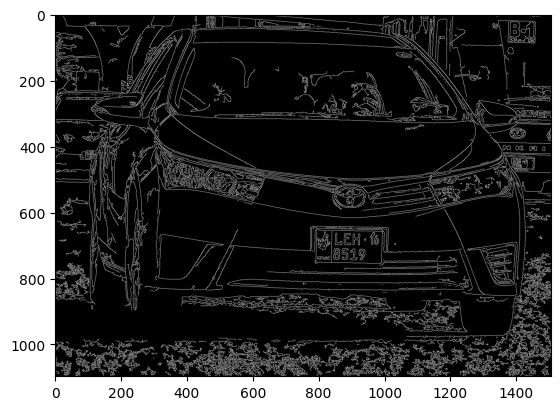

In [28]:
# bfilter = cv2.bilateralFilter(gray,11,17,17)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

edged = cv2.Canny(blurred,5,50)
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

In [29]:
keypoints = cv2.findContours(edged.copy(),cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea,reverse=True)[:10]

In [30]:
location = None
for contour in contours:
  approx = cv2.approxPolyDP(contour,10,True)
  if len(approx) ==4:
    location = approx
    break

In [31]:
print(location)

[[[838 657]]

 [[836 752]]

 [[987 754]]

 [[990 659]]]


In [32]:
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[location],0,255,-1)
new_image = cv2.bitwise_and(img,img,mask=mask)

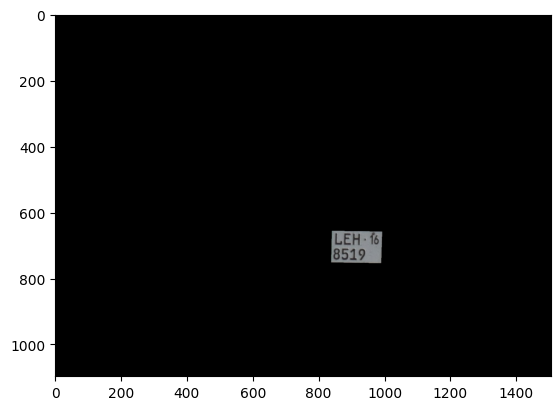

In [33]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

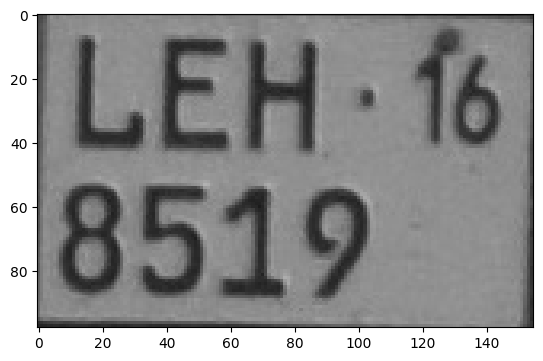

In [34]:
(x,y) =np.where(mask==255)
(x1,y1) = np.min(x),np.min(y)
(x2,y2) = np.max(x),np.max(y)
cropped_image = gray[x1:x2+1,y1:y2+1]
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))

In [35]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[6, 0], [152, 0], [152, 52], [6, 52]], 'LEH , 16', 0.3111226744786451),
 ([[0, 46], [112, 46], [112, 96], [0, 96]], '8519', 0.9999275803565979)]

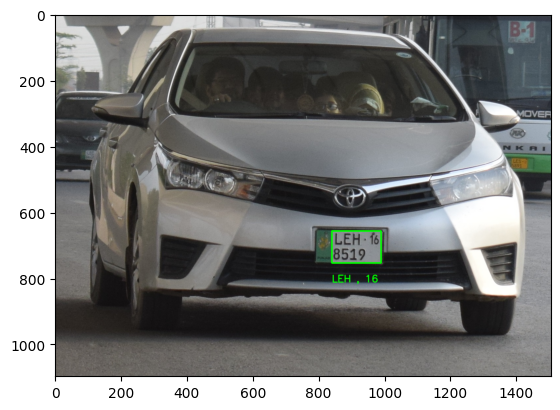

In [36]:
text = None  # Initialize text as None
if result:
    # Check if result is not empty before accessing its elements
    if len(result[0]) >= 2:
        text = result[0][-2]

if text is not None:
    # Rest of your code for drawing text and rectangle
    font = cv2.FONT_HERSHEY_SIMPLEX
    res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1] + 60), fontFace=font, fontScale=1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
    res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0, 255, 0), 3)
    plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
else:
    print("No text detected in the result.")